* 성명 : 최윤서

* https://dacon.io/competitions/official/235647/data
* 데이터 다운받지 않으신 분이 계시다면 다운받는 법은 위 링크에서 받거나
* !git clone https://github.com/DataScience-Lab-Yonsei/8th_EDA
* 실행하면 모든 자료가 다 받아집니다.

# 전처리

In [1]:
!git clone https://github.com/DataScience-Lab-Yonsei/8th_EDA

Cloning into '8th_EDA'...
Updating files: 100% (67/67)
Updating files: 100% (67/67), done.


In [141]:
import numpy as np
import pandas as pd

In [142]:
data = pd.read_csv("data.csv")

In [143]:
# 첫째 column 삭제
data.drop(["index"], axis=1, inplace=True)

In [144]:
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

## 변수뜯어보기
### 1. 마키아벨리즘 테스트(응답내용+응답시간)
- 마키아벨리즘 score 계산
- https://dacon.io/competitions/official/235647/talkboard/401557?page=1&dtype=recent
- https://www.dacon.io/competitions/official/235647/codeshare/1711?page=1&dtype=recent&ptype=pub
- (-) Qa, Qd, Qe, Qf, Qg, Qi, Qk, Qn, Qq, Qr
- (+) Qb. Qc, Qh, Qj, Ql, Qm, Qo, Qp, Qs, Qt
- (+)는 마키아벨리즘 성향이 높다는 것을 의미한다

In [146]:
#마키아벨리즘 스코어, 응답시간(확신정도? 설문에 대한 정확도?)
#사람 성격유형에 따른 응답시간? 
#마키아벨리즘 스코어와 성격유형 사이의 관계..?

In [148]:
data['Machscore']=((data.QbA+data.QcA+data.QhA+data.QjA+data.QlA+data.QmA+data.QoA+data.QpA+data.QsA+data.QtA)+60-(data.QaA+data.QdA+data.QeA+data.QfA+data.QgA+data.QiA+data.QkA+data.QnA+data.QqA+data.QrA))/20
data

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Machscore
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,1,0,1,1,0,1,0,1,1,2.95
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,0,1,1,0,1,0,1,1,2.60
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,0,1,1,1,1,0,1,1,1.90
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,1,0,1,0,1,1,3.35
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,0,1,1,1,1,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,1,0,1,1,1,1,0,1,1,4.15
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,1,0,1,1,1,1,0,1,1,3.80
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,1,0,1,1,0,1,0,1,1,1.50
45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,...,1,0,1,1,1,1,0,1,1,2.90


In [149]:
data['Machscore'].describe()

count    45532.000000
mean         3.352474
std          0.794661
min          1.000000
25%          2.750000
50%          3.350000
75%          3.950000
max          5.000000
Name: Machscore, dtype: float64

### 2. TIPI 성격 특성 검사
- 순서형 변수(0-6), 7은 무응답 
- 0: agree strongly, 6: disagree strongly
- extraversion(외향성), agreeableness(친화성), conscientiousness(성실성), emotional stability(정서적 안정성), openness to experiences(경험 개방성)
- 성격 특성별 score https://brunch.co.kr/@a376100/45

In [150]:
#7에 가까울수록 agree strongly, 0이 무응답
data['tp01']=7-data['tp01']
data['tp02']=7-data['tp02']
data['tp03']=7-data['tp03']
data['tp04']=7-data['tp04']
data['tp05']=7-data['tp05']
data['tp06']=7-data['tp06']
data['tp07']=7-data['tp07']
data['tp08']=7-data['tp08']
data['tp09']=7-data['tp09']
data['tp10']=7-data['tp10']

In [151]:
#성격 특성별 점수
data['extra']=(data['tp01']+(8-data['tp06']))/2
data['agree']=(data['tp07']+(8-data['tp02']))/2
data['consc']=(data['tp03']+(8-data['tp08']))/2
data['stabi']=(data['tp09']+(8-data['tp04']))/2
data['exper']=(data['tp05']+(8-data['tp10']))/2

In [152]:
#무응답자 표시해주기
for i in range(len(data)):
    if (data.loc[i,'tp01']==0)|(data.loc[i,'tp06']==0):
        data.loc[i,'extra']=np.NaN
    if (data.loc[i,'tp02']==0)|(data.loc[i,'tp07']==0):
        data.loc[i,'agree']=np.NaN
    if (data.loc[i,'tp03']==0)|(data.loc[i,'tp08']==0):
        data.loc[i,'consc']=np.NaN
    if (data.loc[i,'tp04']==0)|(data.loc[i,'tp09']==0):
        data.loc[i,'stabi']=np.NaN
    if (data.loc[i,'tp05']==0)|(data.loc[i,'tp10']==0):
        data.loc[i,'exper']=np.NaN

In [153]:
data.loc[:,'extra':'exper']

,extra,agree,consc,stabi,exper
0,3.5,NaN,5.0,2.5,4.5
1,4.5,3.0,6.0,4.0,5.5
2,5.0,4.5,6.5,6.0,4.0
3,4.5,5.5,5.0,4.0,5.0
4,4.5,4.5,6.5,6.0,7.0
...,...,...,...,...,...
45527,6.5,3.5,1.0,1.5,5.0
45528,4.5,3.5,5.0,5.0,6.0
45529,2.5,6.0,4.0,5.5,7.0
45530,4.0,3.5,5.0,5.0,6.0


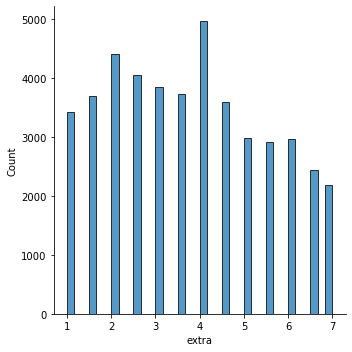

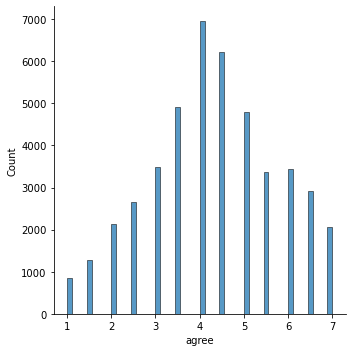

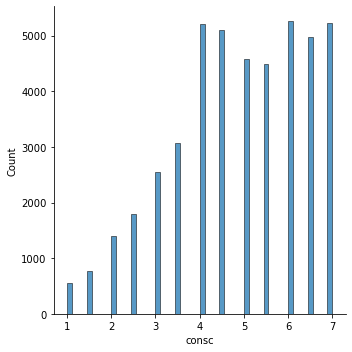

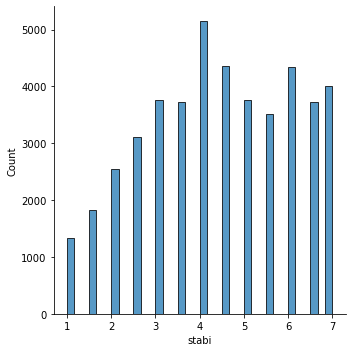

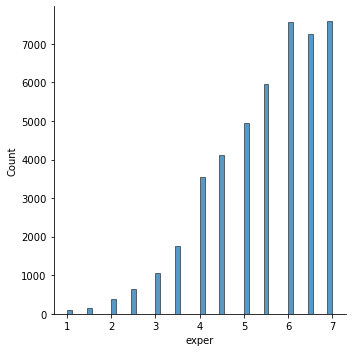

In [154]:
#성격 유형별 점수 분포
import seaborn as sns
sns.displot(data['extra'])
sns.displot(data['agree'])
sns.displot(data['consc'])
sns.displot(data['stabi'])
sns.displot(data['exper'])

#성격유형끼리 관계 있는게 있나..?

<AxesSubplot:>

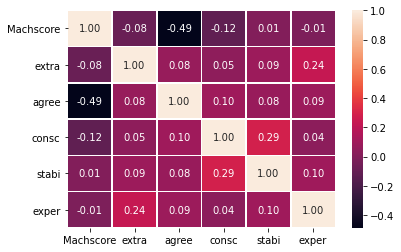

In [155]:
import seaborn as sns
sns.heatmap(data.loc[:,['Machscore','extra','agree','consc','stabi','exper']].corr(),annot=True,fmt='.2f',linewidths=.5)

### 3. 그 외 사회적 변수

### 4. 단어의 정의 아는지(wr, wf): 신뢰성 지표

# 간단한 분석

* pandas의 pivottable 기능을 이용해서 각자 자료를 3개씩 분석해 주세요

## 첫번째 분석
- 분석한 내용: 나이가 많을 수록 정서적 안정성이 더 높게 나타난다

In [104]:
pivot1=pd.pivot_table(data,values='stabi',index='age_group',aggfunc=np.mean)
pivot1.sort_values(by='stabi')

,stabi
age_group,
10s,4.198286
20s,4.288878
30s,4.433599
40s,4.628654
50s,4.853470
60s,5.047702
+70s,5.179907


## 두번째 분석
- 분석한 내용: 종교에 따라 경험개방성에 대한 차이가 나타날 것이라고 예측하였다. 차이가 미세하긴 하지만 종교가 없는 사람들의 경우 경험개방성이 더 높게 나타난다. 또한 여러 종교가운데 protestant(개신교)가 가장 경험개방성이 낮게 나타난다

In [106]:
pivot2=pd.pivot_table(data,values='exper',index='religion',aggfunc=np.mean)
pivot2.sort_values(by='exper')

,exper
religion,
Christian_Protestant,5.337930
Sikh,5.359649
Christian_Catholic,5.371874
Muslim,5.400679
Christian_Mormon,5.421986
Atheist,5.492688
Christian_Other,5.507179
Hindu,5.520156
Jewish,5.558642


## 세번째 분석
- 분석한 내용: 형제자매수가 외향성에 영향을 미칠 것이라고 에측하였다. 이상하게 기입된 값들을 배제하고 보더라도 형제자매수는 외향성 성격 유형에 관계가 없어 보인다.

In [107]:
pivot3=pd.pivot_table(data,values='extra',index='familysize',aggfunc=np.mean)
pivot3.sort_values(by='extra')

,extra
familysize,
18,1.000000
44,2.500000
20,3.000000
17,3.000000
16,3.000000
21,3.250000
14,3.388889
2147483647,3.500000
11,3.605263


## 네번째 분석
- 분석한 내용: 사람들이 긍정적인 질문에 답하는 시간과 부정적인 질문에 답하는 시간에는 차이가 나타날 것이다. 위의 20문항 설문은 마키아벨리즘 성향을 묻는(부정적인) 질문 10개와 그 성향과 반대되는(긍정적인) 질문 10개로 구성되어있다. 보통 사람들은 긍정적인 질문에 대한 응답은 고민없이 빠르게 응답하며, 부정적인 질문에 대한 응답은 긍정적인 질문에 비해 더 길게 나타난다. 즉, 부정적인 질문에 대해서는 바로 답하지 못하고 좀 더 시간이 걸림을 확인할 수 있다. 하지만, 시간의 단위가 상대적이기 때문에 얼마나 차이가 나는지 명확히 알수는 없다. 

In [126]:
#마키아벨리즘 성향과 반대되는 질문(긍정적인 질문) 응답시간 평균
data1=data.loc[:,['QaE','QdE','QeE','QfE','QgE','QiE','QkE','QnE','QqE','QrE']]
data1mean=pd.DataFrame(data1.mean(),columns=['응답시간평균'])
print(data1mean)
data1mean.mean()

          응답시간평균
QaE   945.357046
QdE  1490.672231
QeE  1899.292278
QfE  1850.650268
QgE  1284.607946
QiE  4068.433827
QkE  2038.985790
QnE   959.880502
QqE  1154.351665
QrE  2470.808157


응답시간평균    1816.303971
dtype: float64

In [127]:
#마키아벨리즘 성향을 묻는 질문(부정적인 질문) 응답시간 평균
data2=data.loc[:,['QbE','QcE','QhE','QjE','QlE','QmE','QoE','QpE','QsE','QtE']]
data2mean=pd.DataFrame(data2.mean(),columns=['응답시간평균'])
print(data2mean)
data2mean.mean()
#,마키아벨리즘 성향을 묻는 질문들의 응답시간이 더 긴 경향을 보인다

          응답시간평균
QbE  2189.588575
QcE  1484.294518
QhE  4584.272138
QjE  2576.362910
QlE  3741.017614
QmE  2050.286524
QoE  1435.761662
QpE  1633.478630
QsE  1164.116621
QtE  2240.056861


응답시간평균    2309.923605
dtype: float64

## 다섯번째 분석 
- 허구인 단어를 안다고 답하는(1이라고 답하는) 사람들은 응답시간의 평균이 더 높게 나타날 것이라고 예측하였다.(허구인 단어를 안다고 답하는 사람들은 심리 검사에 있어 솔직하게 답하지 않고 더 고민했을 것이다) 하지만 분석 결과 오히려 솔직한 사람들의 응답시간이 더 오래 걸린다. 응답시간은 설문조사에 대한 정확도보다는 신중함을 나타낼 것이다(?)

In [132]:
data['answertimemean']=(data.QaE+data.QbE+data.QcE+data.QdE+data.QeE+data.QfE+data.QgE+data.QhE+data.QiE+data.QjE+data.QkE+data.QlE+data.QmE+data.QnE+data.QoE+data.QpE+data.QqE+data.QrE+data.QsE+data.QtE)/20
#허구인 단어 3개중에 몇개를 안다고 답했는지
#0일수록 더 솔직한 사람이다
data['wf_sum']=data.wf_01+data.wf_02+data.wf_03
pd.pivot_table(data,values='answertimemean',index='wf_sum',aggfunc=np.mean)

,answertimemean
wf_sum,
0,2184.967287
1,1790.981344
2,1553.004593
3,1534.073971
